In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리

import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math

In [3]:
df = pd.read_excel("C:\\Users\\user\\Desktop\\논문\\key paper\\mouseTracker_data\\Dataset.xlsx")
df = df.replace(['faker','honest'], ['1','2'])

In [4]:
df.columns = df.columns.str.replace(' ', '')

In [5]:
df.columns

Index(['Subjectnumber', 'ST-score', 'S_RT', 'S_MD', 'S_AUC', 'S_MD_time',
       'S_velX', 'S_velY', 'KT-score', 'K_RT', 'K_MD', 'K_AUC', 'K_MD_time',
       'K_velX', 'K_velY', 'LT-score', 'L_RT', 'L_MD', 'L_AUC', 'L_MD_time',
       'L_velX', 'L_velY', 'VRT-score', 'VR_RT', 'VR_MD', 'VR_AUC',
       'VR_MD_time', 'VR_velX', 'VR_velY', 'TimePressure', 'Instructions'],
      dtype='object')

In [6]:
x_data = df[['ST-score', 'S_RT','KT-score', 'K_RT','LT-score', 'L_RT','VRT-score', 'VR_RT']]
y_data = df['Instructions']

use_data = pd.concat([x_data,y_data],axis=1)

In [10]:
use_data.dtypes

ST-score        float64
S_RT            float64
KT-score        float64
K_RT            float64
LT-score        float64
L_RT            float64
VRT-score       float64
VR_RT           float64
Instructions      int32
dtype: object

In [8]:
use_data = use_data.astype(float)

In [9]:
use_data['Instructions'] = use_data['Instructions'].astype(int)

In [11]:
import pickle
from sklearn.preprocessing import StandardScaler

# 표준 스케일러(평균 0, 분산 1)
scaler = StandardScaler()

# 설명변수 및 목표변수 분리
x = use_data[use_data.columns.difference(['Instructions'])]
y = use_data['Instructions']

# 설명변수 데이터 스케일링
x_scaled = scaler.fit_transform(x)

# 스케일러 저장
scaler_path = 'C:/Users/user/Desktop/패널/'
scaler_filename = 'deep_scaler.pkl'
with open(scaler_path + scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"스케일러 저장 완료! 파일 경로: {scaler_path + scaler_filename}")

스케일러 저장 완료! 파일 경로: C:/Users/user/Desktop/패널/deep_scaler.pkl


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, 
                                                    test_size = 0.3, random_state = 1000)

In [13]:
from tensorflow.keras.utils import to_categorical

# 고유 클래스의 개수를 구함
num_classes = y.nunique()  # 또는 y_train과 y_test에서 직접 구해도 됨

# 원-핫 인코딩
y_train = to_categorical(y_train - 1, num_classes=num_classes)
y_test = to_categorical(y_test - 1, num_classes=num_classes)


In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Lambda
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras

from tensorflow.keras.losses import Huber
from tensorflow.keras.activations import elu,gelu,swish,tanh,softmax
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.layers import Input, LSTM, Dense,GRU

from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras import layers

from keras import losses

Epoch 1/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 8s 870ms/step - accuracy: 0.4375 - loss: 0.7466
Epoch 1: val_loss improved from inf to 0.68859, saving model to C:/Users/user/Desktop\DNN.weights.h5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4408 - loss: 0.7103 - val_accuracy: 0.5556 - val_loss: 0.6886
Epoch 2/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - loss: 0.6834
Epoch 2: val_loss improved from 0.68859 to 0.68766, saving model to C:/Users/user/Desktop\DNN.weights.h5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5404 - loss: 0.6949 - val_accuracy: 0.5556 - val_loss: 0.6877
Epoch 3/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.6902
Epoch 3: val_loss improved from 0.68766 to 0.68685, saving model to C:/Users/user/Desktop\DNN.weights.h5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5205 - loss: 0.6839 - val_accuracy: 0.5556 - val_loss: 0.6869
Epoch 4/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6250 - loss: 0

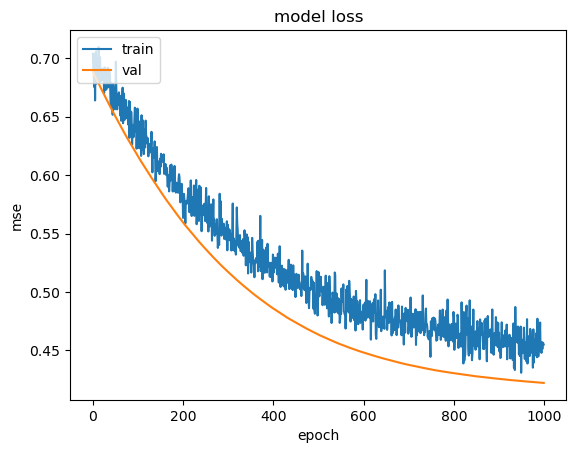

In [22]:
model = keras.models.Sequential()
model.add(layers.Dense(64, activation=gelu, input_shape=(x_train.shape[1],),name = 'Hidden-1'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation=gelu,name = 'Hidden-2'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(y.nunique(), activation='softmax'))

model.compile(optimizer=RMSprop(learning_rate = 0.000005),loss='categorical_crossentropy',metrics=['accuracy'])

import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=30)
model_path = 'C:/Users/user/Desktop'
filename = os.path.join(model_path, 'DNN.weights.h5')

checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True,
                             save_weights_only=True, 
                            #  save_freq = BATCH_SIZE, 
                             mode = 'auto')

history = model.fit(x_train, y_train, 
                                    epochs=1000, 
                                    batch_size=16,
                                    validation_data=(x_test, y_test), 
                                    callbacks=[early_stop, checkpoint]) # 여기에 얼리스타핑 ,드롭아웃, L1,L2,엘라 규제 등 추가 가능

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
x_data

,ST-score,S_RT,KT-score,K_RT,LT-score,L_RT,VRT-score,VR_RT
0,63,4545.84,63,4766.233333,65,6907.733333,75,6123.384615
1,58,7525.48,49,7495.333333,58,5446.533333,63,6643.384615
2,74,3336.54,67,4091.800000,58,2739.466667,58,4162.769231
3,48,4963.36,61,4681.066667,46,3440.266667,33,4211.923077
4,53,6662.22,61,10016.333333,54,6400.133333,63,5521.384615
...,...,...,...,...,...,...,...,...
235,55,4167.66,51,3980.633333,54,3584.933333,63,3497.923077
236,37,3667.22,32,3333.100000,50,3042.933333,44,3531.615385
237,38,4014.12,36,4026.500000,54,3480.866667,46,4936.769231
238,32,3093.18,40,2724.300000,38,2743.466667,46,4170.076923


In [24]:
y_data = y_data.astype(int)

In [25]:
y_data

0      1
1      2
2      1
3      2
4      1
      ..
235    1
236    2
237    1
238    2
239    1
Name: Instructions, Length: 240, dtype: int32

In [26]:
y_data = to_categorical(y_data - 1, num_classes=num_classes)

In [135]:
y_data

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [34]:
scaler_1 = StandardScaler()

# 설명변수 데이터 스케일링
x_data_scaled = scaler_1.fit_transform(x_data)

In [35]:
x_data_scaled

array([[ 1.05304809, -0.18702426,  1.16684962, ...,  2.16234856,
         1.12580636,  0.72942401],
       [ 0.63098473,  1.67882658, -0.19874241, ...,  1.03601948,
         0.31744876,  1.07958731],
       [ 1.9815875 , -0.94428803,  1.55701877, ..., -1.05065444,
        -0.0193669 , -0.59083669],
       ...,
       [-1.05726873, -0.51998737, -1.46679216, ..., -0.47916499,
        -0.82772449, -0.06963208],
       [-1.56374476, -1.09668008, -1.076623  , ..., -1.04757114,
        -0.82772449, -0.58591576],
       [-0.38196734,  0.2451039 , -0.68645385, ...,  0.90831951,
         0.45217503,  0.65607619]])

In [27]:
model.load_weights(filename)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
(240, 1) (240, 1)
Accuracy: 0.7958333333333333
F1 Score: 0.7955458196422053
Precision: 0.7975068091347162
Recall: 0.7958333333333333


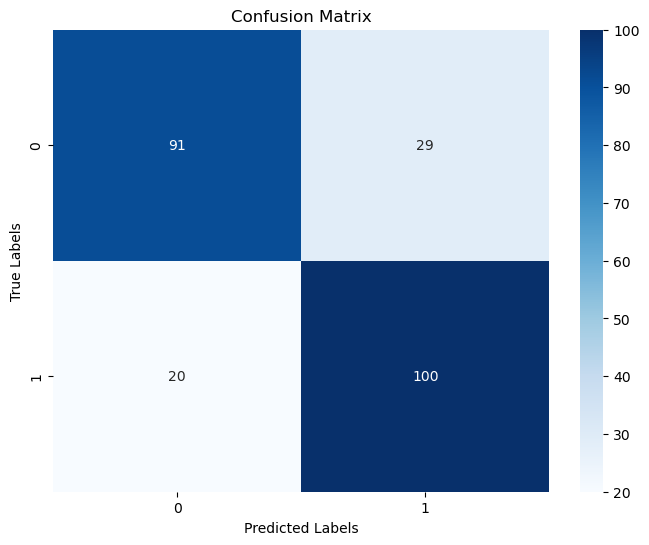

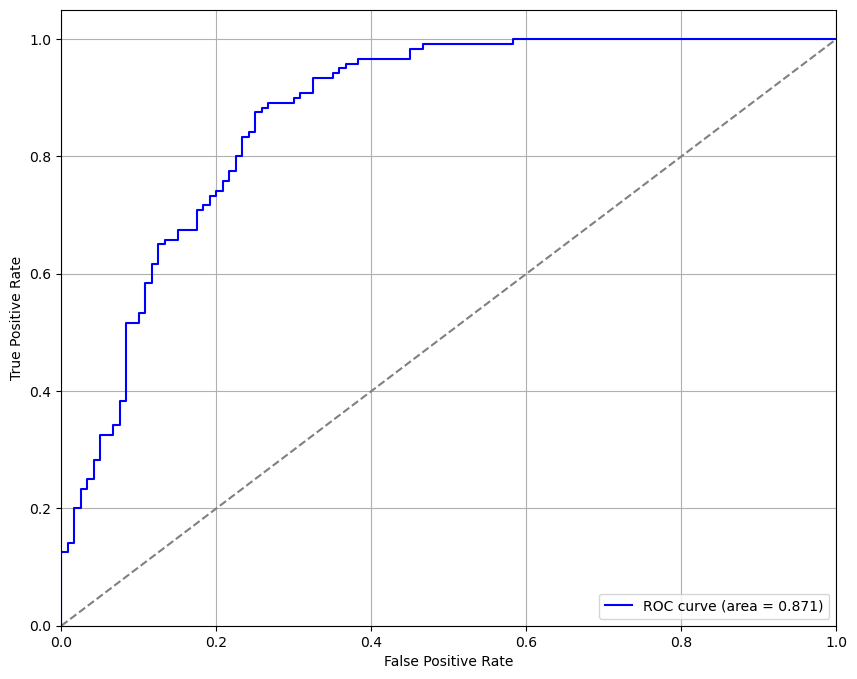

In [65]:
# 예측값 계산 (학습)
predictions = model.predict(x_data_scaled)
actual = np.asarray(y_data)

# 예측값과 실제값 변환
pred = [np.argmax(pred) for pred in predictions]
act = [np.argmax(a) for a in actual]

# DataFrame으로 변환
pred_df = pd.DataFrame(pred, columns=["예측값"])
actual_df = pd.DataFrame(act, columns=["실제값"])

print(pred_df.shape, actual_df.shape)

# 정확도 측정 지표
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(actual_df["실제값"], pred_df["예측값"])
f1 = f1_score(actual_df["실제값"], pred_df["예측값"], average='weighted')
precision = precision_score(actual_df["실제값"], pred_df["예측값"], average='weighted')
recall = recall_score(actual_df["실제값"], pred_df["예측값"], average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# 혼동 행렬 계산
conf_matrix = confusion_matrix(actual_df["실제값"], pred_df["예측값"])

# 혼동 행렬 출력 및 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(act), yticklabels=np.unique(act))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 결과 저장
pred_df.to_excel("C:\\Users\\user\\Desktop\\DNN_Pred.xlsx", index=False)


from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
positive_class = 1
pred_prob_class1 = [prob[positive_class] for prob in predictions]

# ROC 커브 계산
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(act, pred_prob_class1, pos_label=positive_class)
roc_auc = roc_auc_score(act, pred_prob_class1)

# ROC 커브 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [52]:
print(actual_df)
print(pred_df)

    실제값
0     1
1     1
2     0
3     1
4     0
..  ...
67    0
68    0
69    0
70    0
71    0

[72 rows x 1 columns]
    예측값
0     1
1     1
2     0
3     1
4     0
..  ...
67    1
68    1
69    0
70    0
71    0

[72 rows x 1 columns]
